In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import constants
from scipy.optimize import curve_fit

### 1\.

Give an estimate, with the related error, of the net magnetic moment of the sample. Remember that glycerin $(\text{C3H8O3})$ has a molar mass of $92.09382 \; g/mol$ and its density is $1.26 \; g/cm^3$.

In [21]:
h = [2.0, 0.2]
d = 0.8

vol1 = ((d / 2)**2) * constants.pi * h[0]
vol2 = (np.pi * h[1] / 2) * ((d / 2)**2 + ((h[1]**2) / 3))

total_volume = vol1 + vol2
approx_vol = vol1 = ((d / 2)**2) * constants.pi * (h[0] + h[1])

print(f"Total volume with sperical cap: {total_volume} cm^3")
print(f"Approximated volume (cylinder): {approx_vol} cm^3")

Total volume with sperical cap: 1.059763921810957 cm^3
Approximated volume (cylinder): 1.1058406140636075 cm^3


In [33]:
molar_mass = 92.09382
density = 1.26
spins_per_atom = 8

gyromag_ratio = 42.5756 * 10**6
mean_mu = gyromag_ratio * constants.hbar / 2

n_spins = spins_per_atom * d * total_volume * constants.N_A / molar_mass

print(f"Total number of spins: {n_spins}")
print(f"Net magnetic moment: {mean_mu * n_spins}")

Total number of spins: 4.435162322607249e+22
Net magnetic moment: 9.956723838614976e-05


### 2\.

Report the experimental parameters used in your experiment:
- measured Bfield, current flowing in the electromagnet
- drive generator and local oscillator generator frequencies ($\nu_{RF}$ and $\nu_{LO}$ respectively)
- the Larmor frequency of the precessing spins for the measured B.

Remember that for protons the gyromagnetic ratio is $\gamma_p = 42.5756 \;MHz/T$

In [35]:
measured_Bfield = 0.571
flowing_current = 8.89

rf_frequency = 24.33
lo_frequency = 24.3085

larmor_frequency = measured_Bfield * gyromag_ratio

print(f"Larmor frequency of the precessing spins for the measured B: {larmor_frequency * 10**-6} MHz")

Larmor frequency of the precessing spins for the measured B: 24.310667599999995 MHz


### 3\.

Show in a plot the free induction decay signal recorded after a $\frac{\pi}{2}$-pulse, and report the $T^{⋆}_2$ obtained by the fit. Display in the same plot the fit curve. Make a plot of the residuals and briefly describe your error analysis

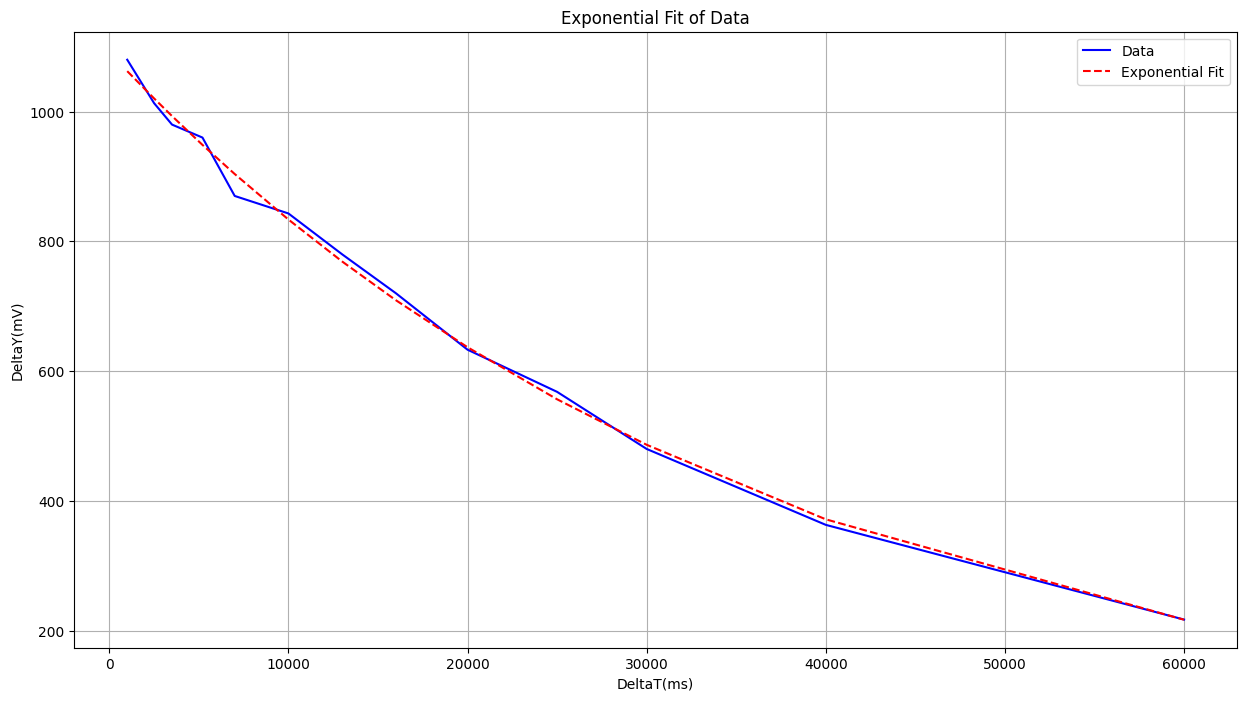

Optimized Parameters (M0, T2*): [ 1091.37063867 37122.75138757]
T2* = 37122.75138756693 +/- 777.1260840520603


In [79]:
peak_apml = pd.read_excel("Amplitude_Data/Amplitude.xlsx", usecols = [5, 6], header = 1)

def exponential_func(x, a, tau):
    return a * np.exp(-x / tau)
  
popt, pcov = curve_fit(exponential_func, peak_apml.iloc[:, 0], peak_apml.iloc[:, 1], p0 = [1000, 20000])
std_dev_T2 = np.sqrt(pcov[1, 1])

plt.figure(figsize=(15, 8))
plt.plot(peak_apml.iloc[:, 0], peak_apml.iloc[:, 1], 'b-', label='Data')
plt.plot(peak_apml.iloc[:, 0], exponential_func(peak_apml.iloc[:, 0], *popt), 'r--', label='Exponential Fit')
plt.xlabel(peak_apml.columns[0])
plt.ylabel(peak_apml.columns[1])
plt.title('Exponential Fit of Data')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimized Parameters (M0, T2*): {popt}")
print(f"T2* = {popt[1]} +/- {std_dev_T2}")

################################################

# NB: TIME DATA HERE ARE IN MICROSECONDS!!! 37000 ms -> 0.37 seconds 

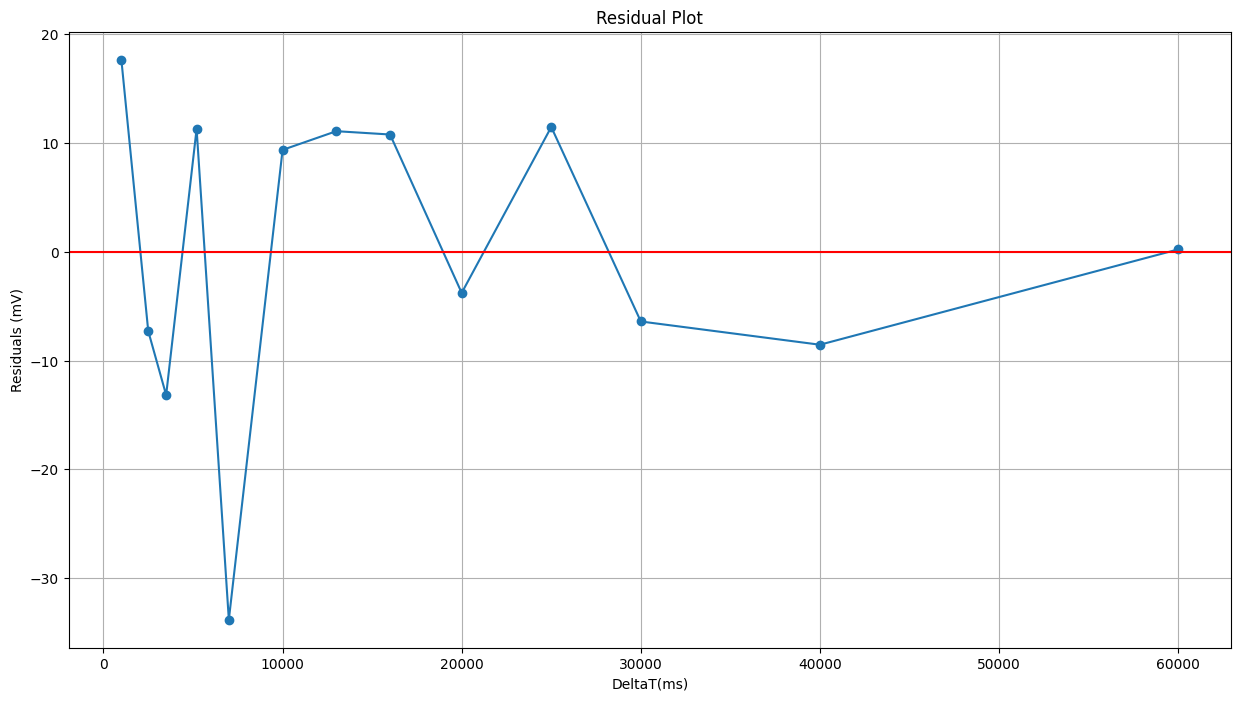

Root Mean Square Error (RMSE): 13.571177160560204
Mean Absolute Error (MAE): 11.1386866627304


In [77]:
fitted_values = exponential_func(peak_apml.iloc[:, 0], *popt)

residuals = peak_apml.iloc[:, 1] - fitted_values

plt.figure(figsize=(15, 8))
plt.plot(peak_apml.iloc[:, 0], residuals, marker='o')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0 for reference
plt.xlabel(peak_apml.columns[0])
plt.ylabel('Residuals (mV)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(np.mean(residuals**2))

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))

print("Root Mean Square Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

################################################

# THE RESIDUALS TELL ME HOW GOOD MY FITTING AND MY MODEL ARE, 
# WE CANNOT USE THEM TO TELL SOMETHING ABOUT PARAMETERS.

### 4\.

Explain the pulses sequence used to measure the spin-spin relaxation time T2. What is the effect of the second pulse on each precessing spin and in turn on the magnetization vector?
A pictorial representation can be also used here.

In [38]:
data = pd.read_csv("File1/File1_zoom.csv", skiprows = 150000, skipfooter = 300000 , engine = "python")

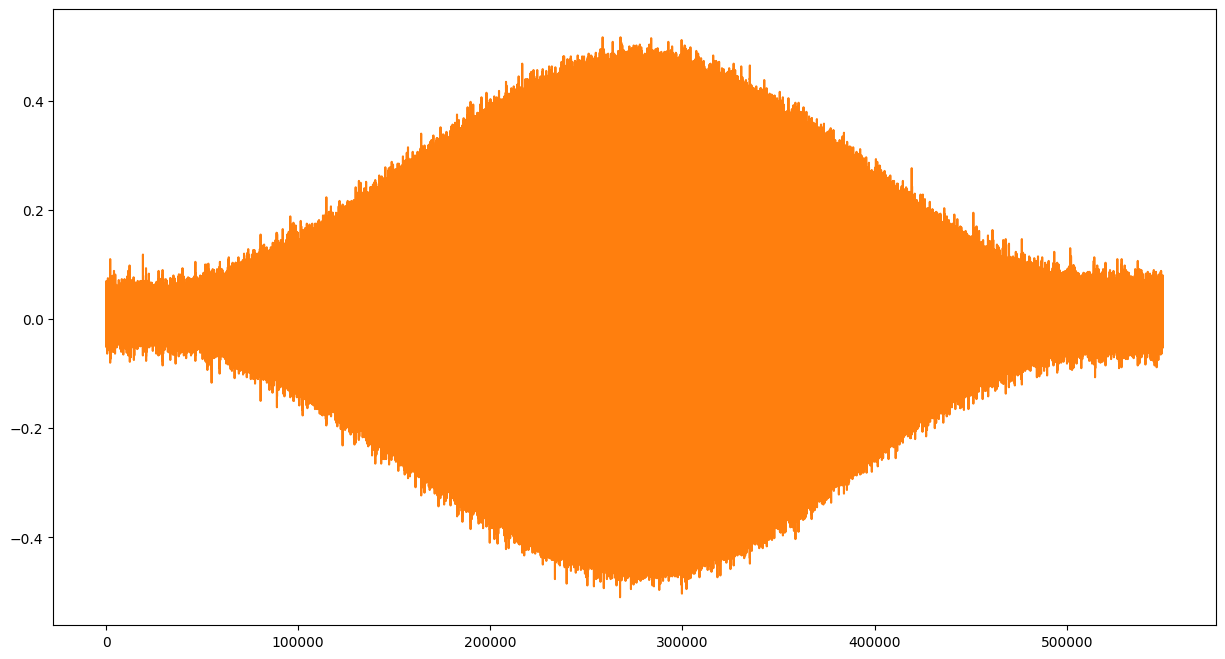

In [39]:
fig = plt.figure(figsize=(15, 8))
plt.plot(data)